In [20]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
sklearn.__version__

'1.0.2'

In [3]:
from sklearn.datasets import load_iris #데이터 적재
from sklearn.neighbors import KNeighborsClassifier#사용할 머신러닝 모델
from sklearn.model_selection import train_test_split #학습데이터와 테스트데이터를 분리

# 1. 데이터 적재

In [14]:
iris_data = load_iris()

### 2. 데이터 훑어보기

In [5]:
type(iris_data)

sklearn.utils.Bunch

In [8]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
iris_data["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
iris_data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
iris_data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
iris_data["target_names"] #'setosa' =0, 'versicolor'=1, 'virginica'=2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
print(iris_data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [22]:
iris_df = pd.DataFrame(iris_data["data"], columns=iris_data["feature_names"])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
iris_df["target"]= iris_data["target"]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 3. 데이터 시각화 (탐색)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

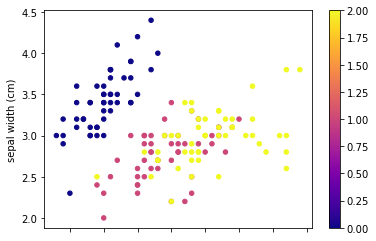

In [26]:
iris_df.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)", c=iris_df["target"], cmap="plasma")

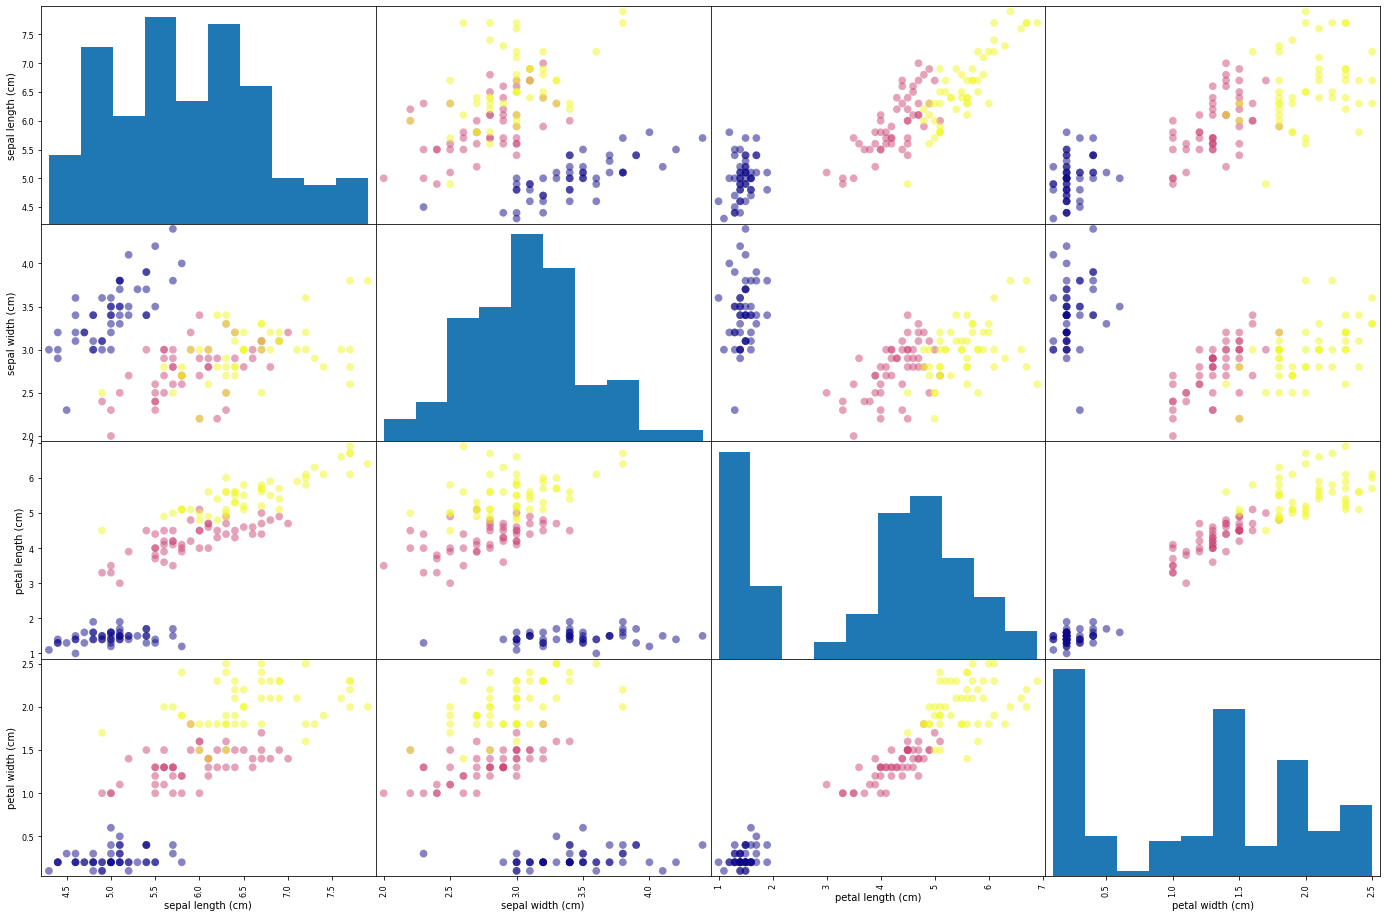

In [30]:
a = pd.plotting.scatter_matrix(iris_df[iris_df.columns[:-1]], c=iris_df["target"],marker='o', s=60, cmap="plasma", figsize = (24, 16))

- 산점도를 찍는 목적
: 특성과 특성간의 선형적인 관계가 있는지(비례하는지, 반비례하는지)
: 상관계수와 함께 상관관계를 확인할때 사용
- 색을 입혀서 추가적인 알수 있는 특성
: 이 특성이 세 가지의 품종을 구분하기에 용이한 특성이다.

In [31]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


### 4.데이터 준비

In [48]:
#훈련(학습) 데이터와 테스트 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(iris_data["data"], iris_data["target"], test_size=0.2, random_state=42) #넘파이

# X_train, X_test, y_train, y_test = train_test_split(iris_df[iris_df.columns[:-1]], iris_df[iris_df.columns[-1]], test_size=0.2) # 데이터프레임

In [ ]:
150행 4열 <- 특성데이터, 150,1 <- 타겟데이터

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [41]:
y_test, y_train

(array([0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1,
        1, 2, 2, 0, 1, 2, 0, 0]),
 array([2, 0, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1,
        0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2,
        2, 0, 0, 0, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1,
        1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 1, 0,
        1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1,
        0, 0, 0, 1, 2, 0, 1, 2, 0, 2]))

### 5.모델 훈련

In [42]:
#모델 생성
knn_clf = KNeighborsClassifier()

#모델 훈련
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

### 6. 모델 예측

In [49]:
pred =knn_clf.predict(X_test)

In [50]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### 7.모델 평가

In [51]:
(pred == y_test).sum()/len(y_test) #맞은 갯수/ 전체갯수

1.0

In [52]:
from sklearn.metrics import accuracy_score # 정확도 
accuracy_score(y_test, pred)

1.0

### 비용함수
- 주어진 데이터에서 비용 함수의 값이 가장 작아지는 모델 파라미터를 찾는 과정을 훈련 또는 학습이라고함.